In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/var/folders/gr/_p57hwls3zv8msw7pfq9d7yc0000gn/T/ipykernel_5367/110135090.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Loading and reading the data
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')

data

,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [3]:
print(data.columns)

Index(['Unnamed: 0', '542644', '548869', '93219', '534737', '36820', '542661',
       '10066', '542456', '24820',
       ...
       '543880+543332+542784+530997+530785',
       '535034+535038+542800+543348+543896', '543924+543376+542828+535086',
       '542832+542696+543380+543928', '543932+542700+542836+543384',
       '547724+543360+547728+543908+547720+542812+547716+531033',
       '543888+542792+543340+531025',
       '543372+543368+543920+543916+542692+542688+542824+542820',
       '543364+543912+542684+542816',
       '8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132'],
      dtype='object', length=464)


In [4]:
X = data.drop(columns=['542236']) #Features
y = data['542236'] # Target variable

In [5]:
#Splitting the dataset
X_train = X.iloc[:36]
y_train = y.iloc[:36]

X_test = X.iloc[36:]
y_test = y.iloc[36:]

In [6]:
from sklearn.neural_network import MLPRegressor

# Creating the MLPRegressor model
# Hyperparameter
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200, 180, 140, 120, 100, 90, 80, 60, 50, 40, 30, 20, 10, 5), activation='relu', solver='adam', alpha=0.0001, max_iter=50)

# The hidden layer specifies the number of neurons in each hidden layer. In this case, there are two hidden layers with 100 and 50 neurons
# The activation = relu specifies the activation function that is used in hte hidden layers.
# The solver = adam specifies the adaptive learning rate optimization algorithm that is commonly used for training deep neural networks
# max iter = 500 specifies the maximum nums of iterations (epochs) for training the neural network. Training will stop once this number of iterations is reached or convergence is achieved.

In [7]:
#Training the model
mlp_regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 180, 140, 120, 100, 90, 80, 60, 50, 40,
                                 30, 20, 10, 5),
             max_iter=50)

In [8]:
# Predicting on the testing set
y_pred = mlp_regressor.predict(X_test)

In [9]:
# Evaluating the model and calculating the accuracy
mse = mean_squared_error(y_test, y_pred)
accuracy = 100 * (1-abs((y_test - y_pred)/ y_test))


print("Mean Squared Error:", mse)
print("Accuracy: ", accuracy.mean())

Mean Squared Error: 366310989.1120072
Accuracy:  66.07661749826794


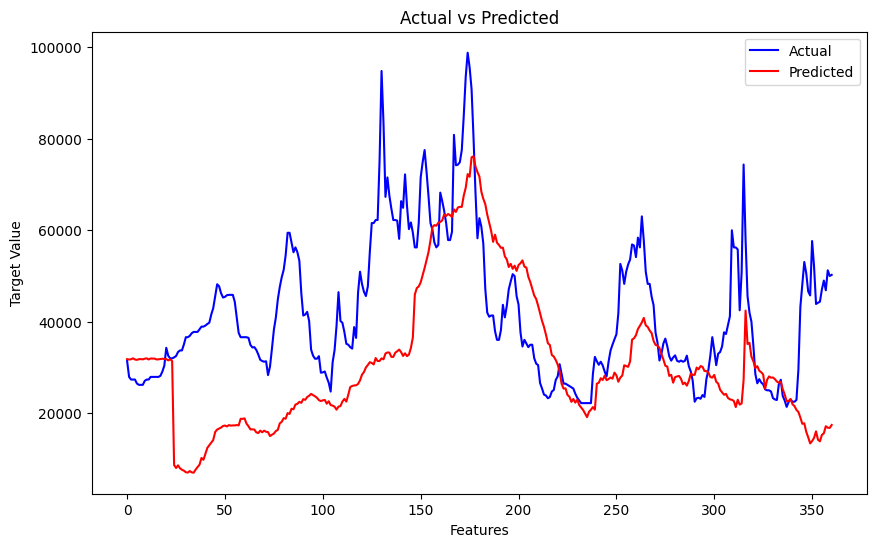

In [10]:
# Visualizing the results using a line graph
plt.figure(figsize=(10, 6))

plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Features')
plt.ylabel('Target Value')

plt.legend()

plt.show()